In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("2015.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
155,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
156,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
157,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
158,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
df.nunique()

Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  156
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          157
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64

In [4]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,160.000000,159.000000,160.000000,160.000000,160.000000,160.000000,159.000000,160.000000,160.000000,160.000000
mean,79.162500,5.579283,0.047816,0.851160,0.994338,0.633447,0.430126,0.143490,0.238056,2.092992
std,45.730257,2.044057,0.017061,0.403194,0.272543,0.247161,0.151089,0.120280,0.127353,0.554077
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.750000,4.568000,0.037145,0.546262,0.859208,0.440095,0.328480,0.061067,0.148800,1.757448
50%,79.500000,5.268000,0.043940,0.918560,1.033960,0.697535,0.436260,0.107220,0.216130,2.087970
75%,118.250000,6.296500,0.052260,1.162160,1.217087,0.813548,0.552430,0.180675,0.312897,2.456625
max,158.000000,21.010000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        160 non-null    object 
 1   Region                         160 non-null    object 
 2   Happiness Rank                 160 non-null    int64  
 3   Happiness Score                159 non-null    float64
 4   Standard Error                 160 non-null    float64
 5   Economy (GDP per Capita)       160 non-null    float64
 6   Family                         160 non-null    float64
 7   Health (Life Expectancy)       160 non-null    float64
 8   Freedom                        159 non-null    float64
 9   Trust (Government Corruption)  160 non-null    float64
 10  Generosity                     160 non-null    float64
 11  Dystopia Residual              160 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [8]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  1
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          1
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [12]:
df['Happiness Score'].fillna(df['Happiness Score'].median(), inplace=True)

/tmp/ipykernel_5154/1943645453.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Happiness Score'].fillna(df['Happiness Score'].mean(), inplace=True)


In [13]:
df['Happiness Score'].isnull().sum()

0

In [14]:
df['Freedom'].fillna(df['Freedom'].median(), inplace=True)
df['Freedom'].isnull().sum()

/tmp/ipykernel_5154/1829731997.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Freedom'].fillna(df['Freedom'].median(), inplace=True)


0

In [32]:
duplicated = df.duplicated()
print(duplicated.sum())
df[duplicated]

2


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
24,Ireland,Western Europe,18,6.940,0.03676,1.33596,1.36948,0.89533,0.61777,0.28703,0.45901,1.97570
114,Portugal,Western Europe,88,5.102,0.04802,1.15991,1.13935,0.87519,0.51469,0.01078,0.13719,1.26462


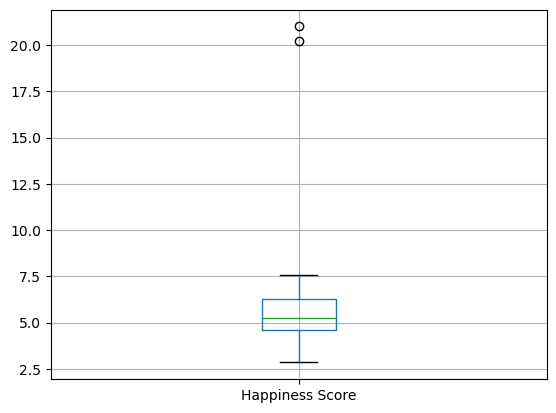

In [33]:
df.boxplot(column="Happiness Score")
plt.show()

In [39]:
# removivng outliers

def removeoutlier(col):
    sorted(col)
    quant1, quant3 = col.quantile([0.25, 0.75])
    IQR=quant3-quant1
    lr=quant1-1.5*IQR
    up=quant3+1.5*IQR
    return lr, up

In [40]:
lowerscore,highscore=removeoutlier(df['Happiness Score'])

In [42]:
#np where take 3 args :col, condn, rest 
df['Happiness Score']=np.where(df['Happiness Score'] > highscore, highscore, df['Happiness Score'])
df['Happiness Score']=np.where(df['Happiness Score'] < lowerscore, lowerscore, df['Happiness Score'])

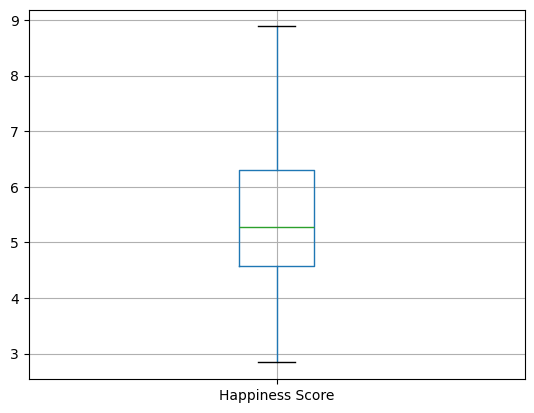

In [43]:
df.boxplot(column="Happiness Score")
plt.show()

In [44]:
#normalization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [46]:
df['Happiness Score']=scaler.fit_transform(df[['Happiness Score']])
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,1.813850,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,1.791979,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,1.763378,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,1.759172,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,1.679259,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
155,Rwanda,Sub-Saharan Africa,154,-1.653542,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
156,Benin,Sub-Saharan Africa,155,-1.758691,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
157,Syria,Middle East and Northern Africa,156,-2.039649,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
158,Burundi,Sub-Saharan Africa,157,-2.124610,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


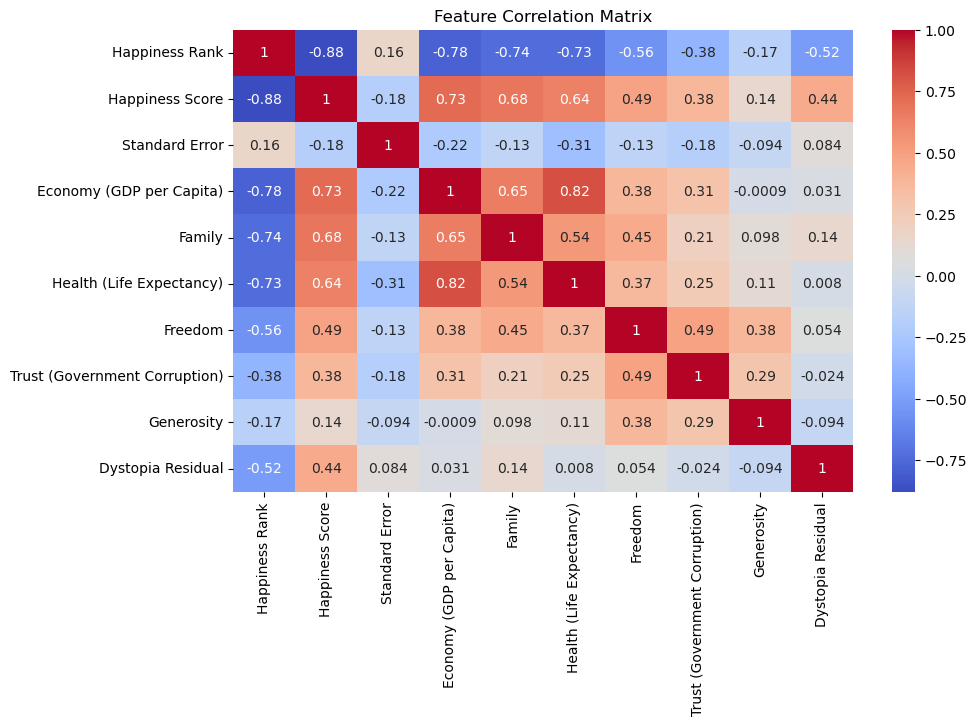

In [49]:
num_data = df.select_dtypes(include=[np.number])

corr_matrix = num_data.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

num_data = df.select_dtypes(include=[np.number])

corr_matrix = num_data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:

sns.hea